In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font',family='AppleGothic')
elif platform.system() == 'Windows':
    font_name =font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unkown Sytem....Sorry')

In [49]:
data = pd.read_excel("서울시 비만도 통계.xlsx", encoding = 'utf-8' , header=2) # utf-8, ascii, euc-kr, cp949 중 하나다.
data = data.drop(0,0)
data = data.iloc[:,1:]
data

,자치구,비만(BMI≥25),저체중(BMI<18.5),정상(18.5≤BMI＜25),체질량지수(BMI)(평균)
1,종로구,34.5,5.7,59.8,23.8
2,중구,31.6,8.8,59.6,23.2
3,용산구,30.2,1.1,68.7,23.8
4,성동구,32.8,4.3,63,23.7
5,광진구,30.5,6.2,63.3,23.5
6,동대문구,26.4,4,69.5,23.5
7,중랑구,38.8,5.6,55.7,24.1
8,성북구,39.0,4.2,56.8,24.2
9,강북구,31.3,6.2,62.6,23.7
10,도봉구,33.5,5.7,60.8,23.8


<function matplotlib.pyplot.show(*args, **kw)>

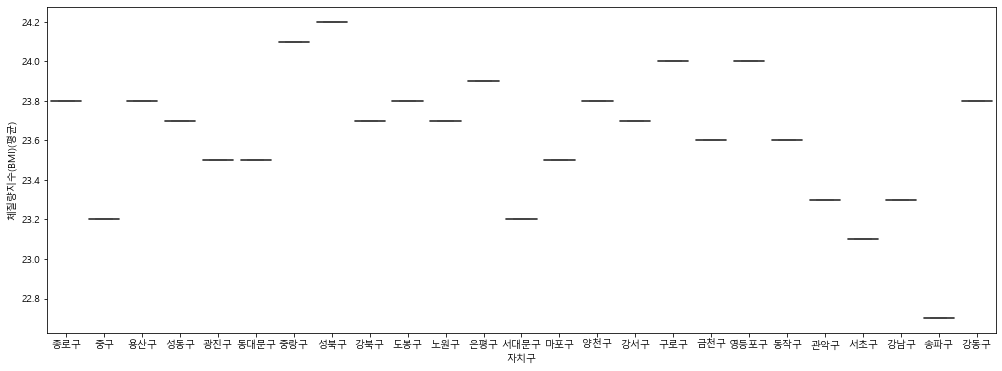

In [22]:
plt.figure(figsize = (17,6))
sns.boxplot(x="자치구" , y="체질량지수(BMI)(평균)", data= data)
plt.show

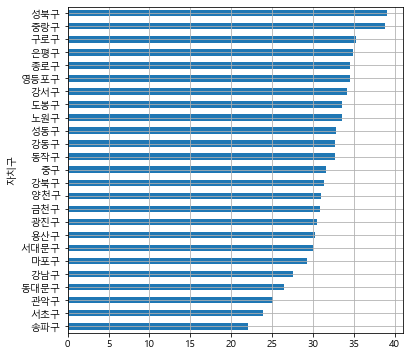

In [39]:
# data.set_index('자치구',inplace=True)
data.rename(columns={'비만(BMI≥25)':'비만율'},inplace=True)
data
data['비만율'].sort_values().plot(kind = 'barh',grid=True,figsize=(6,6))


In [47]:
import folium
import json

geo_path = '../20200608_pyda1/data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles = 'Stamen Toner')
map.choropleth(geo_data= geo_str,
                data = data['비만율'],
                columns = [data.index, data['비만율']],
                fill_color = 'PuRd',
                key_on = 'feature.id')
map

In [57]:
data

col = ['비만','저체중','정상','평균']
data.columns = col

from sklearn import preprocessing
x = data[col].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.astype(float))
data2 = pd.DataFrame(x_scaled, columns = col, index=data.index)
data2


,비만,저체중,정상,평균
자치구,,,,
종로구,0.735294,0.597403,0.282759,0.733333
중구,0.564706,1.000000,0.268966,0.333333
용산구,0.482353,0.000000,0.896552,0.733333
성동구,0.635294,0.415584,0.503448,0.666667
광진구,0.500000,0.662338,0.524138,0.533333
동대문구,0.258824,0.376623,0.951724,0.533333
중랑구,0.988235,0.584416,0.000000,0.933333
성북구,1.000000,0.402597,0.075862,1.000000
강북구,0.547059,0.662338,0.475862,0.666667


In [58]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map.choropleth(geo_data= geo_str,
                data = data2['평균'],
                columns = [data2.index, data2['평균']],
                fill_color = 'PuRd',
                key_on = 'feature.id')

map